In [1]:
!pip install pycbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [2]:
%matplotlib inline
from pycbc.catalog import Merger
import pycbc.psd
import pylab
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.11/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


 we have three ground-based detectors: LIGO Hanford (H1), LIGO Livingston (L1) and Virgo (V1). But what does the data actually look like?

In [3]:
# Create a Merger object for the gravitational wave event 'GW150914'
m = Merger('GW150914')

# Specify the interferometer (IFO) to be used ('L1' represents the Livingston detector)
ifo = 'L1'

# Retrieve the strain data from the specified interferometer for the merger event
data = m.strain(ifo)

**Exercise 1:** We can see that this object is a PyCBC timeseries, and as such you can check what their atributes are (see [here](https://pycbc.org/pycbc/latest/html/pycbc.types.html#module-pycbc.types.timeseries)). Let's check some of them.

- How much is the duration of the time series?

- How much is its sampling rate?

- How many data points does it have?

- How much is $\Delta_{f}$ and $\Delta_{t}$? Can you find a relation between these and the number of data points?

_Hint:_ $\Delta_{f} = 1/duration$ and  $\Delta_{t} = 1/sample\_rate$

In [21]:
import pycbc.types
import numpy as np

# Retrieve the duration of the strain data (total observation time in seconds)
T = data.duration

# Retrieve the sampling rate of the data (samples per second)
fs = data.sample_rate

# Retrieve the time resolution (spacing between consecutive time samples)
delta_t = data.delta_t

# Retrieve the frequency resolution (spacing between consecutive frequency bins in Fourier space)
delta_f = data.delta_f

# Get the number of data points in the strain data (length of the dataset)
shape = data.shape[0]

# Compute a normalization factor based on the relationship between duration, sampling rate, and data points
N = 1 / (1 / T * 1 / fs)

print(T, fs, N, shape)


32.0
32.0 4096.0 131072.0 131072


In [26]:
print(data.__dir__())
for attr in data.__dir__():
    print(attr)

['_scheme', '_saved', '_data', '_delta_t', '_epoch', '__module__', '__doc__', '__init__', 'to_astropy', 'epoch_close', 'sample_rate_close', '_return', '_typecheck', '_getslice', 'prepend_zeros', 'append_zeros', 'get_delta_t', 'delta_t', 'get_duration', 'duration', 'get_sample_rate', 'sample_rate', 'time_slice', 'delta_f', 'start_time', 'get_end_time', 'end_time', 'get_sample_times', 'sample_times', 'at_time', 'at_times', '__eq__', 'almost_equal_elem', 'almost_equal_norm', 'lal', 'crop', 'save_to_wav', 'psd', 'gate', 'filter_psd', 'whiten', 'qtransform', 'notch_fir', 'lowpass_fir', 'highpass_fir', 'fir_zero_filter', 'resample', 'save', 'to_timeseries', 'to_frequencyseries', 'inject', 'add_into', 'cyclic_time_shift', 'match', 'detrend', 'plot', '__hash__', '__array_ufunc__', '__array__', 'shape', '_memoize_single', '_returnarray', '_returntype', '_checkother', '_vcheckother', '_vrcheckother', '_icheckother', '__mul__', '__rmul__', '__imul__', '__add__', '__radd__', 'fill', '__iadd__', '_

The previous magnitudes are key parameters of the timeseries. Now, let's plot the actual data to see what it looks like.

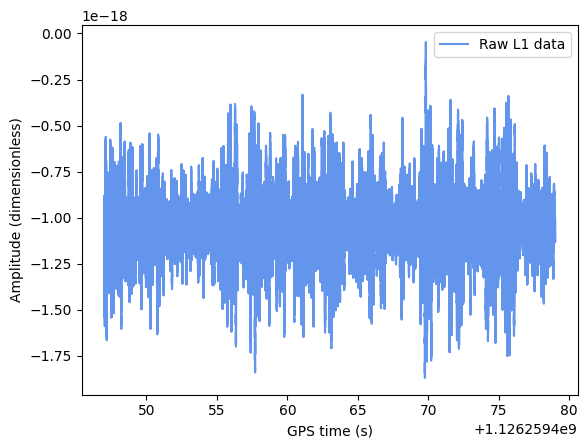

In [6]:
plt.plot(data.sample_times, data, label='Raw L1 data', color='cornflowerblue')
plt.xlabel('GPS time (s)')
plt.ylabel('Amplitude (dimensionless)')
plt.legend()

**Exercise 2**: Estimate the PSD of the data using `filter_psd` (see [here](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.filter_psd)) and plot it. Limit your plot according to the minimum frequency (say, 1 Hz) and  the Nyquist frequency.

_Hint_: Note that the PSD is a frequency series.

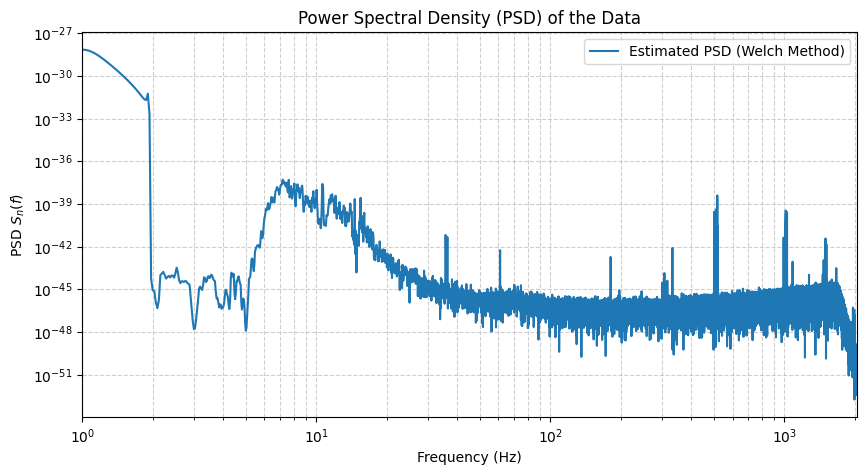

In [7]:
flow = 1  # Set the lower frequency limit (in Hz) for the power spectral density (PSD) estimation
nyquist_freq = fs / 2  # Nyquist frequency

# Calculate the Power Spectral Density (PSD) of the data using a Welch-like method
psd = data.filter_psd(T, delta_f, flow=flow)

# Generate frequency values from 1 Hz to the Nyquist frequency
freqs = np.linspace(1, nyquist_freq, len(psd))

# Plot the estimated PSD
plt.figure(figsize=(10, 5))
plt.loglog(freqs, psd, label="Estimated PSD (Welch Method)")  # Log-log plot of frequency vs PSD
plt.xlim(1, nyquist_freq)  # Set x-axis limits from 1 Hz to the Nyquist frequency
plt.xlabel("Frequency (Hz)")
plt.ylabel(r"PSD $S_n(f)$")
plt.title("Power Spectral Density (PSD) of the Data")
plt.legend()
plt.grid(which='both', linestyle='--', alpha=0.6)
plt.show()




**Exercise 3:** We can whiten the data with [this](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.whiten) function. Use `segment_duration = 4` and `max_filter_duration=4`.

- Plot the whitened data next to the raw detector noise. What differences can you see?

- Estimate the PSD of the whitened data. Plot it in the same graph as the raw PSD. What differences can you see?


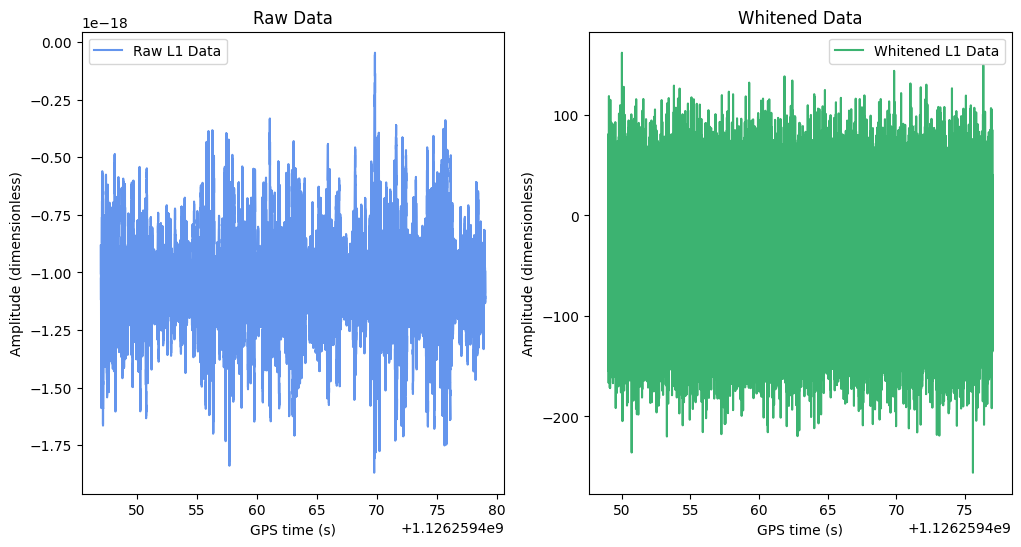

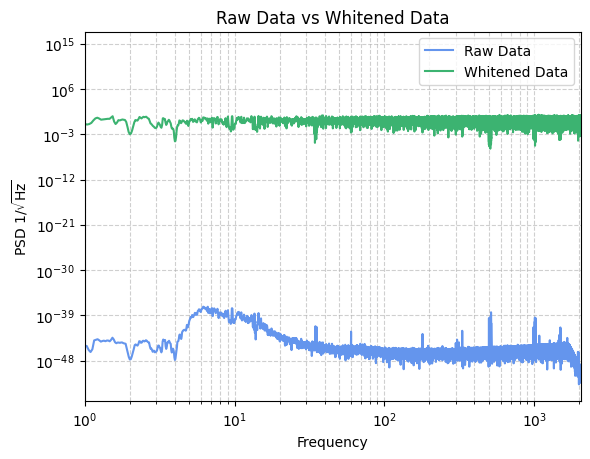

In [8]:
# Whiten the raw data with a window size of 4 seconds before and after each sample
whitened_data = data.whiten(4, 4)

# Calculate the Power Spectral Density (PSD) for the whitened data
whitened_psd = whitened_data.filter_psd(whitened_data.duration, whitened_data.delta_f, flow=1)

# Create a figure for side-by-side time-domain plots
fig = plt.figure(figsize=(12, 6))

# Plot the raw detector data
plt.subplot(1, 2, 1)  # Create the first subplot in a 1-row, 2-column grid
plt.plot(data.sample_times, data, label="Raw L1 Data", color='cornflowerblue')  # Time vs raw data
plt.xlabel('GPS time (s)')
plt.ylabel('Amplitude (dimensionless)')
plt.title("Raw Data")
plt.legend()


# Plot the whitened detector data
plt.subplot(1, 2, 2)  # Create the second subplot
plt.plot(whitened_data.sample_times, whitened_data, label="Whitened L1 Data", color='mediumseagreen')  # Time vs whitened data
plt.xlabel('GPS time (s)')  # Label for the x-axis
plt.ylabel('Amplitude (dimensionless)')
plt.title("Whitened Data")  # Title for the second plot
plt.legend()

plt.show()

# Plot the PSDs for both raw and whitened data on a log-log scale
plt.loglog(psd.get_sample_frequencies(), psd, label="Raw Data", color='cornflowerblue')  # PSD for raw data
plt.loglog(whitened_psd.get_sample_frequencies(), whitened_psd, label="Whitened Data", color='mediumseagreen')  # PSD for whitened data

# Set the x-axis limit from 1 Hz to the Nyquist frequency
plt.xlim(1, nyquist_freq)
plt.xlabel("Frequency")
plt.ylabel("PSD $1 / \sqrt{\mathrm{Hz}}$")
plt.title("Raw Data vs Whitened Data")
plt.legend()
plt.grid(which='both', linestyle='--', alpha=0.6)
plt.show()


**Exercise 4:** We can apply a [low pass filter](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.lowpass_fir) and a [high pass filter](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.highpass_fir) to limit the frequency of the data. The low pass filters above 250 Hz (order=512) and the high pass filters below 30 Hz (order=512).

- Estimate the PSD of the bandpassed data and plot it together with the raw PSD and the whitened PSD. What is the bandpass doing?

- Plot the bandpassed data [cropping](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.crop) 12s on the left and 13s on the right. What can you see? Compare this to the raw data. What frequencies dominate in each case?

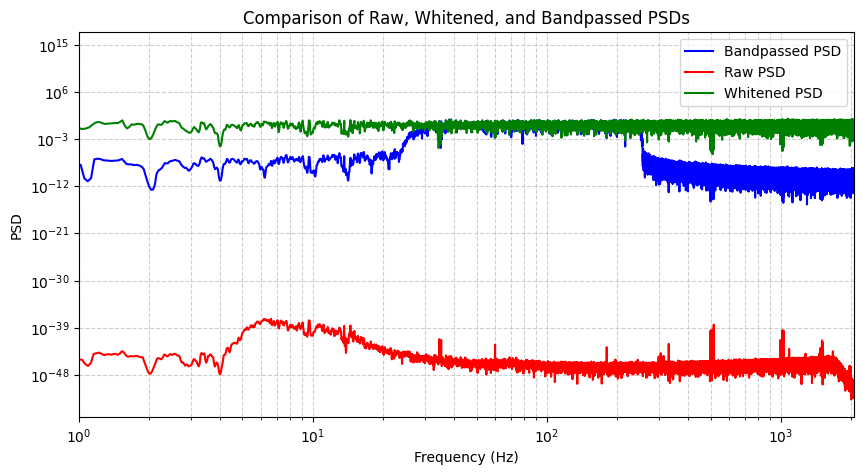

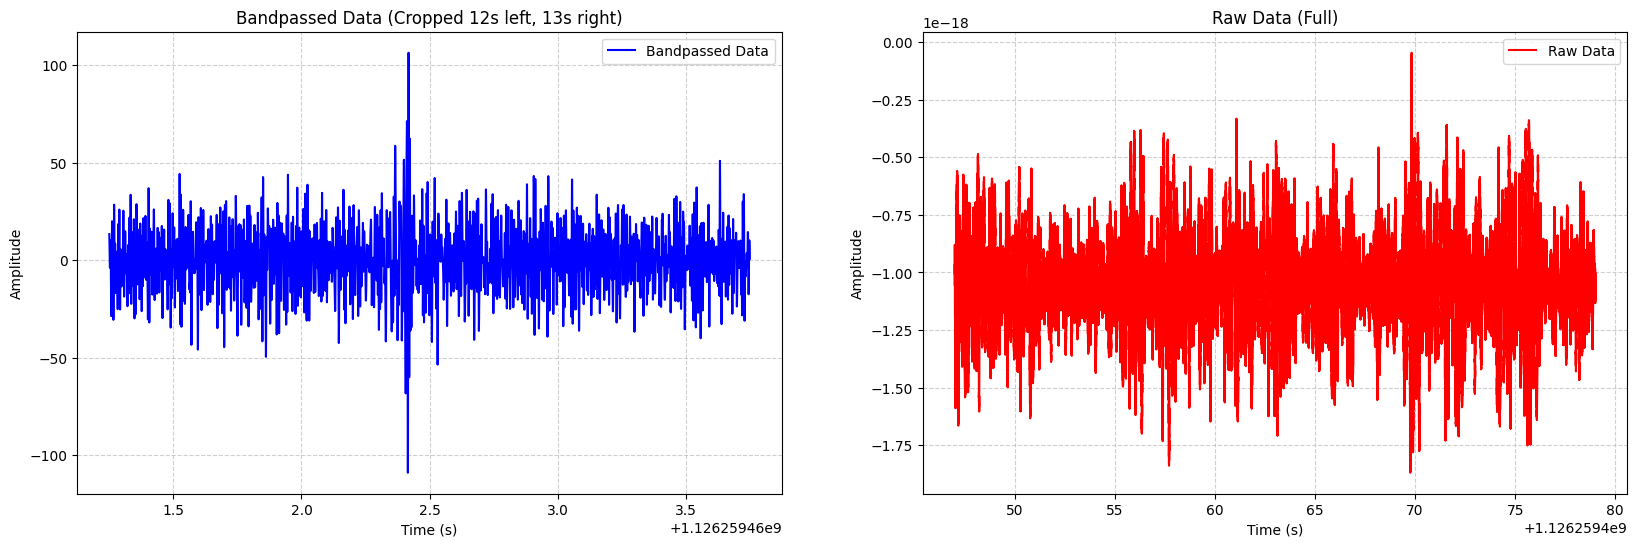

In [9]:
# Lowpass and highpass filtering to create bandpassed data
low_data = whitened_data.lowpass_fir(250, order=512, beta=5, remove_corrupted=True)  # Lowpass filter at 250 Hz
high_data = low_data.highpass_fir(30, order=512, beta=5, remove_corrupted=True)  # Highpass filter at 30 Hz
psd_high = high_data.filter_psd(high_data.duration, high_data.delta_f, flow=1)  # Estimate PSD of the bandpassed data

# Plot the PSDs for comparison
plt.figure(figsize=(10, 5))
plt.loglog(psd_high.get_sample_frequencies(), psd_high, label='Bandpassed PSD', color='blue')  # Bandpassed PSD
plt.loglog(psd.get_sample_frequencies(), psd, label='Raw PSD', color='red')  # Raw PSD
plt.loglog(whitened_psd.get_sample_frequencies(), whitened_psd, label='Whitened PSD', color='green')  # Whitened PSD
plt.xlim(1, nyquist_freq)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.title('Comparison of Raw, Whitened, and Bandpassed PSDs')
plt.legend()
plt.grid(which='both', linestyle='--', alpha=0.6)
plt.show()

# Crop the bandpassed data
bandpassed_data = high_data.crop(12, 13)  # Crop 12 seconds from the start and 13 seconds from the end

# Plot the cropped bandpassed data
fig1 = plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(bandpassed_data.sample_times, bandpassed_data, label="Bandpassed Data", color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Bandpassed Data (Cropped 12s left, 13s right)')
plt.legend()
plt.grid(which='both', linestyle='--', alpha=0.6)

# Plot the raw data for comparison
plt.subplot(1, 2, 2)
plt.plot(data.sample_times, data, label="Raw Data", color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Raw Data (Full)')
plt.legend()
plt.grid(which='both', linestyle='--', alpha=0.6)
plt.show()


**Exercise 5:** Last but not least, we generate a spectrogram (time-frequency representation) using [this](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.qtransform) function.

_Hint_: logfsteps=200, qrange=(110, 110), frange=(20, 512), vmax=3.5 as it is standard

In [31]:
spectrogram = data.qtransform(
    delta_t=data.delta_t,
    delta_f= None,
    logfsteps=200,
    frange=(20, 512),
    qrange=(110, 110),
    mismatch=0.2,
    return_complex=False
)

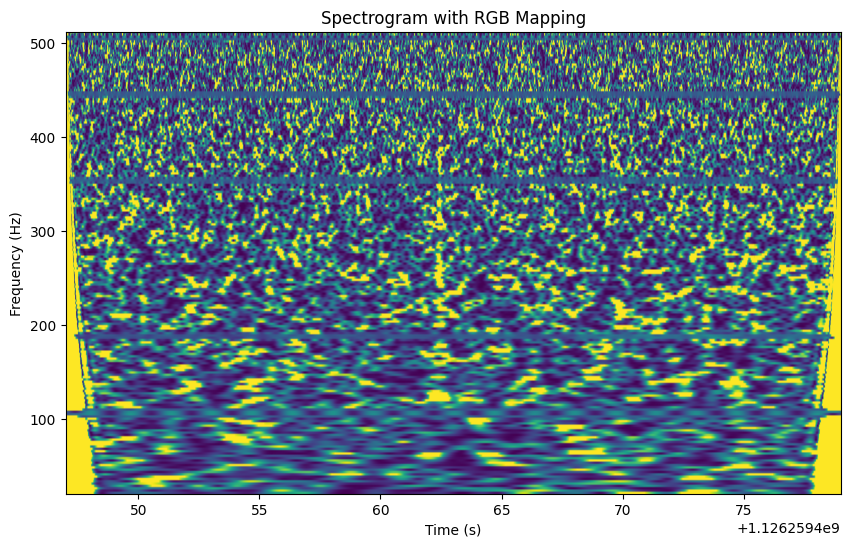

In [58]:
from matplotlib import colors

# Find the minimum and maximum amplitude values
min_amp = np.min(amplitude)
max_amp = np.max(amplitude)

# Normalize the amplitude values to the range [0,1]
new_amp = amplitude / max_amp
new_rgb_array = np.zeros((new_amp.shape[0], new_amp.shape[1], 3), dtype=np.uint8)  # Initialize an RGB array

# Loop through each column (time step)
for col in range(new_amp.shape[1]):
    col_max = np.max(amplitude[:, col])
    for row in range(new_amp.shape[0]):
        value = amplitude[row, col] / col_max
        intensity = int(value * 255)
        if intensity > 255:
            intensity = 255
        new_rgb_array[row, col] = (20, 50, intensity)  # Assign RGB values (blue-dominant mapping)

plt.figure(figsize=(10, 6))

# Default grayscale spectrogram visualization
plt.imshow(amplitude, aspect='auto',
           extent=[time.min(), time.max(), frequency.min(), frequency.max()],
           origin='lower',
           norm=colors.Normalize(vmin=0, vmax=3.5))

plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram with RGB Mapping")
plt.show()
